### **Import Libraries**

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import os 
from matplotlib import font_manager 
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Set Paths**

In [24]:
github_folder = str(Path(os.getcwd()).parent.parent.absolute())
github_folder

'/Users/ppower1/Documents/GitHub'

### **Style**

In [25]:
locations = github_folder + '/evictions/styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader
/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader/static/Newsreader_9pt/Newsreader_9pt-MediumItalic.ttf


### **Read in Data**

In [26]:
df = pd.read_csv("./../data/GDP.csv")
df.head()

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


### **Convert to Date Time**

In [27]:
# Convert observation_date to datetime format if it's not already
df['observation_date'] = pd.to_datetime(df['observation_date'])

### **Plot**

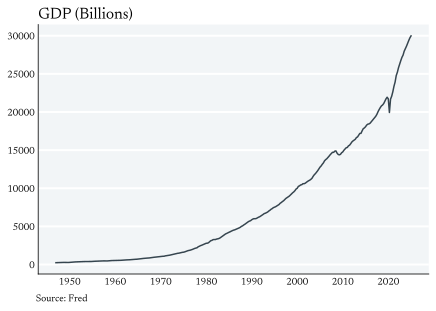

In [40]:
# Create only one set of axes
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)

# Set the facecolor directly on the existing axes
ax.set_facecolor((.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'right', 'top':
    ax.spines[key].set_visible(False)

ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

plt.plot(df['observation_date'], df['GDP'], color='#36454F')

plt.title('GDP (Billions)', loc='left', size=16)

ax.text(0.06, -0.1, 'Source: Fred', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
fig.savefig('./../figures/gdp.png')
plt.show()

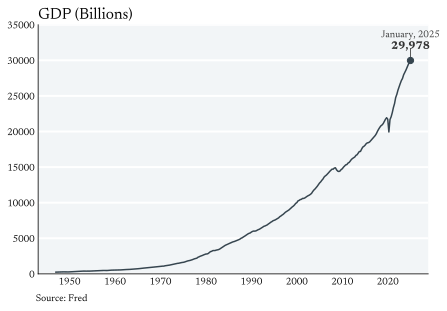

In [55]:
# Create only one set of axes
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)

# Set the facecolor directly on the existing axes
ax.set_facecolor((.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'right', 'top':
    ax.spines[key].set_visible(False)

ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

plt.plot(df['observation_date'], df['GDP'], color='#36454F')

# Get the last value and date
last_date = df['observation_date'].iloc[-1]
last_value = df['GDP'].iloc[-1]

# Add a dot at the end of the line
ax.scatter(last_date, last_value, color='#36454F', s=40, zorder=5)

# Format the date (safely)
if hasattr(last_date, 'strftime'):  # Works for both pandas Timestamp and datetime
    formatted_date = last_date.strftime('%B, %Y')
else:
    formatted_date = str(last_date)

# Calculate the y-range for positioning
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min

# Add annotations
ax.annotate(formatted_date, 
            xy=(last_date, last_value + 0.10 * y_range),
            ha='center',
            fontsize=10,
            color='#333333')

# Format GDP value with commas and billions
ax.annotate(f'{last_value:,.0f}', 
            xy=(last_date, last_value + 0.05 * y_range),
            ha='center',
            fontsize=11,
            fontweight='bold',
            color='#333333')

# Simplified connecting line - draw a vertical line from data point to text
ax.plot([last_date, last_date], 
        [last_value, last_value + 0.05 * y_range], 
        color='#333333', 
        linewidth=0.8)

plt.title('GDP (Billions)', loc='left', size=16)
ax.set_ylim(0, 35000)
ax.text(0.06, -0.1, 'Source: Fred', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
fig.savefig('./../figures/gdp.png')
plt.show()